In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import neurokit2 as nk

from lists import dyads, num_dyads, participants, num_participants

In [193]:
# Set sampling rate
sampling_rate = 1000
print("Sampling rate:", sampling_rate)

# Set conditions
condition = ["sit","gaze","gaze_swap"]
print("Conditions:", condition)

# Show number of participants 
print("Participants:", num_participants)

# Show number of dyads
print("Dyads:", num_dyads)

Sampling rate: 1000
Conditions: ['sit', 'gaze', 'gaze_swap']
Participants: 4
Dyads: 2


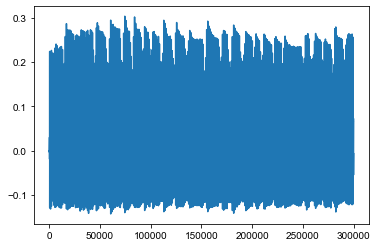

In [194]:
# Load ECG-data as list and downsaples to 1000 Hz
ecg_raw_2000hz = np.load(f"data/ecg_raw/ecg_raw_{condition[1]}.npy")
ecg_raw = []

for i in range(num_participants):
    ecg_raw.append(ecg_raw_2000hz[i][::2]) # change sampling rate to 1000 Hz

plt.plot(ecg_raw[1])

In [195]:
# Analyze raw ECG data

sampling_rate=1000
ecg_process = []
ecg = []
for i in range(num_participants):
        ecg_process_temp, info_temp = nk.ecg_process(ecg_raw[i], sampling_rate=sampling_rate)
        ecg_process.append(ecg_process_temp)
        ecg.append(ecg_process[i]["ECG_Clean"])

ecg_process[3]

C:\conda\envs\two-hearts\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\conda\envs\two-hearts\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.168152,-0.038235,66.912929,0.811767,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.174866,-0.035290,66.912929,0.811767,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.178833,-0.032303,66.912929,0.811767,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.180359,-0.029246,66.912929,0.811767,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.179291,-0.026100,66.912929,0.811767,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-0.005646,0.001395,75.282309,0.968216,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299996,-0.005646,0.001344,75.282309,0.968216,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299997,-0.005493,0.001298,75.282309,0.968216,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299998,-0.005646,0.001254,75.282309,0.968216,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


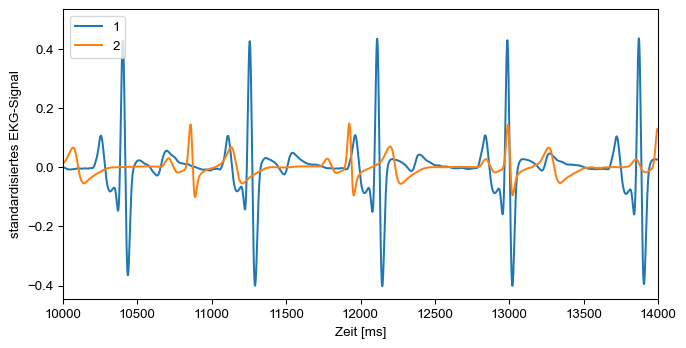

In [196]:
xlim1 = 10*sampling_rate
xlim2 = 14*sampling_rate

# Plot cleaned ECG data for a dyad
fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('standardisiertes EKG-Signal')
plt.plot(ecg[0][:xlim2],"-", label="1")
plt.plot(ecg[1][:xlim2],"-", label="2")
plt.legend(loc="upper left")

plt.savefig("plots\ecg_data.png", dpi=96)

5 4


300000

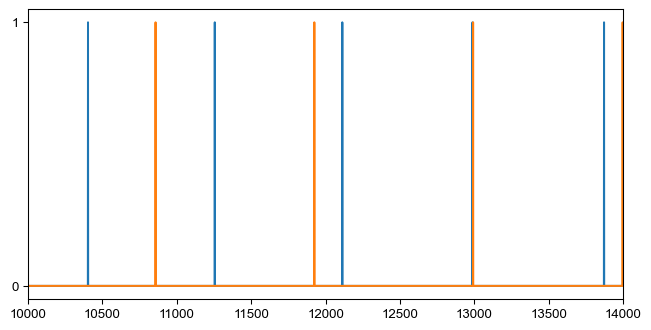

In [197]:
# Create IBIs
rpeaks = []
for i in range(num_participants):
    rpeaks.append(ecg_process[i]["ECG_R_Peaks"]) # binary data

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.yticks(range(2))
plt.plot(rpeaks[0][:xlim2])
plt.plot(rpeaks[1][:xlim2])

print(sum(rpeaks[0][xlim1:xlim2]),sum(rpeaks[1][xlim1:xlim2]))

len(rpeaks[0])

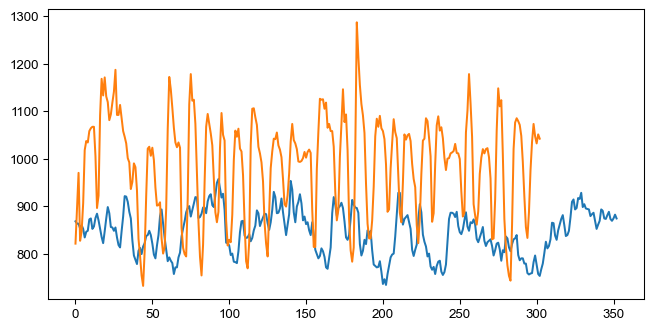

In [198]:
# Create tachogram
def get_ibi(rpeaks):
        start = np.squeeze(np.array(np.where(rpeaks == 1)))
        ibi = []
        for i in range(len((start))):
                if i > 0: # skip first iteration
                        ibi.append(start[i]-start[i-1])
        return ibi, start[1] # start[1], not start[0], to get the true starting point for the IBI-intervals (=differences of start)

ibi = []
start = []
for i in range(num_participants):
    ibi_temp, start_temp = get_ibi(rpeaks[i])
    ibi.append(ibi_temp)
    start.append(start_temp)


fig = plt.figure(figsize=(8,4), dpi=96)
plt.plot(ibi[0])
plt.plot(ibi[1])

366 300000


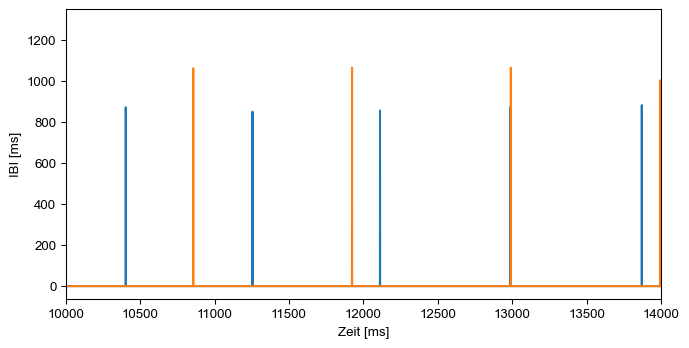

In [199]:
# IBI time series
def get_ibi_timeseries(rpeaks, ibi, start, begin_at_0 = True): # begin_at_0 to add zeros for true lenght of the time series
    ibi_ts = rpeaks[start:]
    ibi_ts = np.array(ibi_ts)

    j = 0
    for i in range(len(ibi_ts)):
        if ibi_ts[i] == 1:
            ibi_ts[i] = ibi[j]
            j = j+1
    ibi_ts = pd.Series(ibi_ts)

    if begin_at_0 == "True":
        intro = pd.Series(np.zeros(start))
        ibi_ts = pd.concat([intro, ibi_ts],ignore_index=True)
    return ibi_ts

ibi_ts = []
for i in range(num_participants):
    ibi_ts.append(get_ibi_timeseries(rpeaks[i], ibi[i], start[i], begin_at_0 = "True"))


fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(ibi_ts[0])
plt.plot(ibi_ts[1])

print(len(ibi[2]),len(ibi_ts[3]))

[10, 10, 13, 10]
[14, 13, 17, 13]


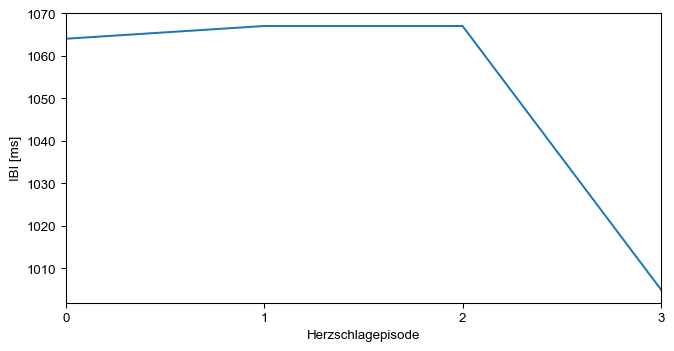

In [200]:
# Plot IBIs with interval from xlim1 to xlim2
''''WRONGO!'''''
def get_ibi_limits(ibi, ibi_ts, xlim1, xlim2):
    lim1_time = np.argmax(ibi_ts[xlim1:xlim2]>0) + xlim1
    lim2_time = xlim2 - np.argmax(ibi_ts[xlim2:xlim1:-1]>0)
    
    lim1 = ibi.index(ibi_ts[lim1_time])
    lim2 = ibi.index(ibi_ts[lim2_time])

    return lim1, lim2

lim1 = []
lim2 = []
for i in range(num_participants):
    lim1_temp, lim2_temp = get_ibi_limits(ibi[i], ibi_ts[i], xlim1=xlim1, xlim2=xlim2)
    lim1.append(lim1_temp)
    lim2.append(lim2_temp)


fig = plt.figure(figsize=(8,4), dpi=96)
plt.xticks(range(0,100))
plt.xlabel('Herzschlagepisode')
plt.ylabel('IBI [ms]')
plt.margins(x=0)
# plt.plot(ibi[0][lim1[0]:lim2[0]])
plt.plot(ibi[1][lim1[0]:lim2[0]])
print(lim1)
print(lim2)


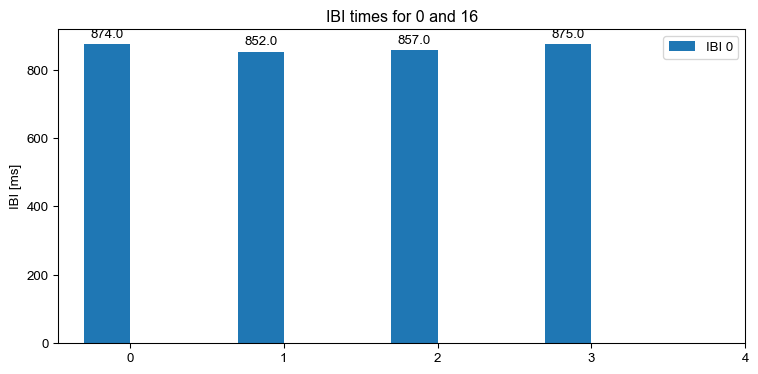

In [201]:
# TODO
#  Plot tachogramm for two IBI-series
ibi_plot_1 = ibi[0][lim1[0]:lim2[0]] + [np.nan]
ibi_plot_2 = ibi[1][lim1[1]:lim2[1]]

width = 0.3  # the width of the bars
x = np.arange(len(ibi_plot_1))  # the label locations

fig, ax = plt.subplots(figsize=(8,4), dpi=96)
rects1 = ax.bar(x - width/2, ibi_plot_1, width, label='IBI 0')
# rects2 = ax.bar(x + width/2, ibi_1_plot, width, label='IBI 16')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('IBI [ms]')
ax.set_title('IBI times for 0 and 16')
ax.set_xticks(x)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()


<class 'pandas.core.series.Series'>


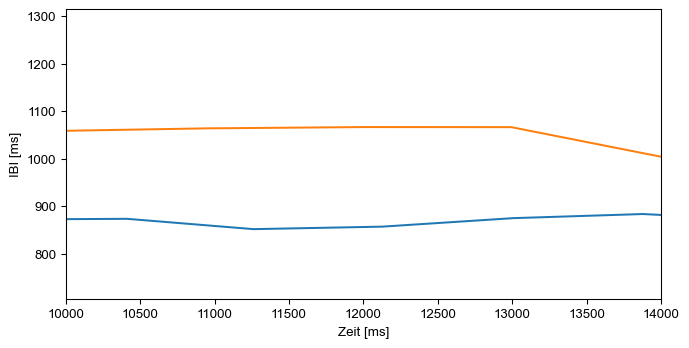

In [202]:
# Imputate IBIs
def get_ibi_timeseries_interpolated(ibi_ts):
    ibi_ts_ip = ibi_ts.replace(0, np.nan, inplace=False)
    ibi_ts_ip = ibi_ts_ip.interpolate(method='linear', axis=0, limit=None, inplace=False)
    return ibi_ts_ip

ibi_ts_ip = []
for i in range(num_participants):
    ibi_ts_ip.append(get_ibi_timeseries_interpolated(ibi_ts[i]))


fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(ibi_ts_ip[0])
plt.plot(ibi_ts_ip[1])

print(type(ibi_ts_ip[0]))

In [203]:
# TODO: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Resampling-and-converting-frequencies

251086.81413043477 296030.0


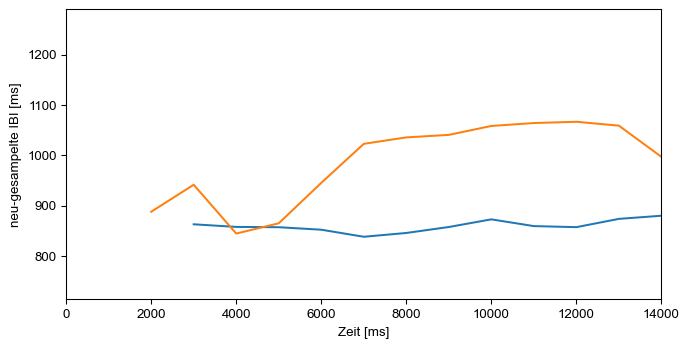

In [204]:
# Resampling at 1 Hz with rolling windows
def get_ibi_timeseries_interpolated_window(ibi_ts_ip):
    ibi_ts_ip_win = ibi_ts_ip.rolling(sampling_rate,center=True).mean() 
    ibi_ts_ip_win = ibi_ts_ip_win.iloc[::sampling_rate]    
    return ibi_ts_ip_win

ibi_ts_ip_win = []
for i in range(num_participants):
    ibi_ts_ip_win.append(get_ibi_timeseries_interpolated_window(ibi_ts_ip[i]))

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(0, xlim2)
plt.xlabel('Zeit [ms]')
plt.ylabel('neu-gesampelte IBI [ms]')
plt.margins(x=0)
plt.plot(ibi_ts_ip_win[0])
plt.plot(ibi_ts_ip_win[1])

print(sum(ibi_ts_ip_win[0][4:]), sum(ibi_ts[0][4000:]))

300000

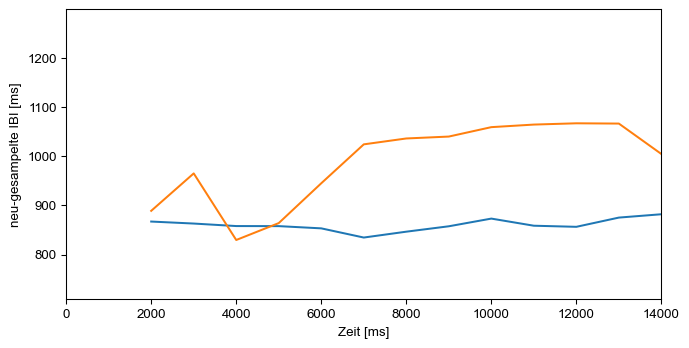

In [205]:
# Resampling at 1 Hz
ibi_ts_ip_1hz = []
for i in range(num_participants):
    ibi_ts_ip_1hz.append(ibi_ts_ip[i][::sampling_rate])


fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlabel('Zeit [ms]')
plt.ylabel('neu-gesampelte IBI [ms]')
plt.xlim(0, xlim2)
plt.margins(x=0)
plt.plot(ibi_ts_ip_1hz[0])
plt.plot(ibi_ts_ip_1hz[1])

len(ibi_ts_ip[0])

30634.0 26428.440847398197 26433.137942532885


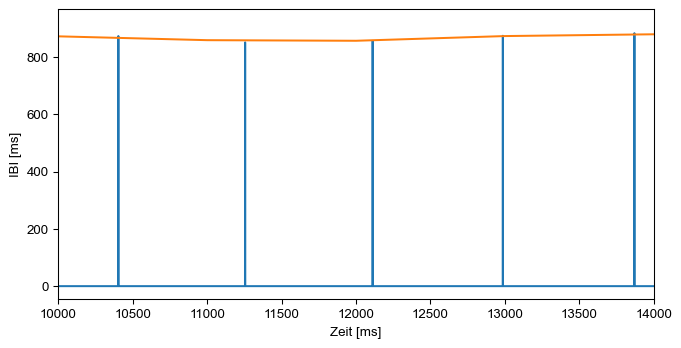

In [206]:
# Checksum for IBI and imputated IBI

print(sum(ibi_ts[0][9000:40000]),sum(ibi_ts_ip_win[0][9:40]),sum(ibi_ts_ip_1hz[0][9:40]))

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.xlim(xlim1, xlim2)
plt.margins(x=0)
plt.plot(ibi_ts[0][9000:40000])
plt.plot(ibi_ts_ip_win[0][9:40])
#plt.plot(ibi_ts_ip_0[9000:40000:sampling_rate])
#plt.plot(ibi_ts_ip_0[9000:])

353 300 300


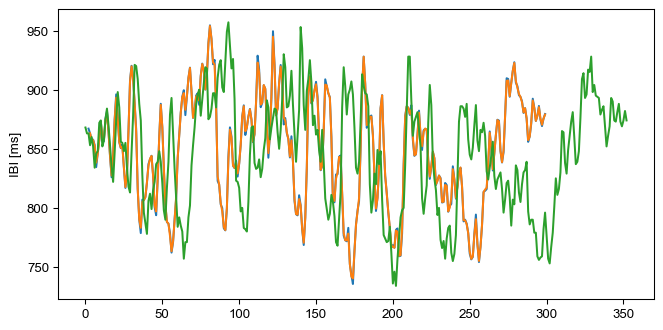

In [217]:
print(len(ibi[0]),len(ibi_ts_ip_1hz[0]),len(ibi_ts_ip_win[0]))

fig = plt.figure(figsize=(8,4), dpi=96)
# plt.xlabel('Zeit [ms]')
plt.ylabel('IBI [ms]')
plt.plot(np.array(ibi_ts_ip_1hz[0]))
plt.plot(np.array(ibi_ts_ip_win[0]))
plt.plot(np.array(ibi[0]))

In [219]:
# Prepare data for violin plot
def flatten(nested_list):
    list_of_lists = []
    for item in nested_list:
        list_of_lists.extend(item)
    return list_of_lists

ibi_all = flatten(ibi)

ibi_ts_ip_1hz_all = []
for i in range(num_participants):
    ibi_ts_ip_1hz_all.append(np.array(ibi_ts_ip_1hz[i].dropna()))
ibi_ts_ip_1hz_all = flatten(ibi_ts_ip_1hz_all)

ibi_ts_ip_win_all = []
for i in range(num_participants):
    ibi_ts_ip_win_all.append(np.array(ibi_ts_ip_win[i].dropna()))
ibi_ts_ip_win_all = flatten(ibi_ts_ip_win_all)

print(len(ibi_all),len(ibi_ts_ip_1hz_all),len(ibi_ts_ip_win_all))


1355 1192 1190


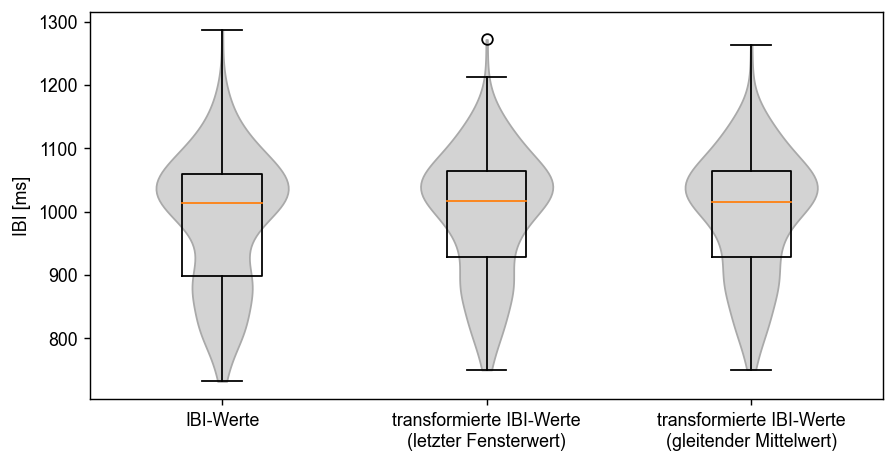

In [220]:
# Create Violin plot for all data
## combine these different collections into a list
import matplotlib as mpl
# set global parameters
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

# dataset = [np.array(ibi_all),np.array(ibi_ts_ip_1hz_all), np.array(ibi_ts_ip_win_all)]
i = 1
dataset = [np.array(ibi[i]),np.array(ibi_ts_ip_1hz[i].dropna()), np.array(ibi_ts_ip_win[i].dropna())]
positions = [1,2,3]

# Draw violin plot with box plot

fig,ax = plt.subplots(figsize=(8,4), dpi=128)
vp = ax.violinplot(dataset=dataset,positions=[1,2,3], vert=True, widths=0.5, showmeans=False, showextrema=False, showmedians=False)
bp = ax.boxplot(dataset)

plt.xticks(ticks=[1,2,3], labels=["IBI-Werte","transformierte IBI-Werte\n(letzter Fensterwert)","transformierte IBI-Werte\n(gleitender Mittelwert)"])
plt.ylabel('IBI [ms]')
plt.margins(y=0.05)
plt.margins(x=0.02)
for body in vp['bodies']:
    body.set_facecolor('lightgrey')
    body.set_edgecolor('darkgrey')
    body.set_alpha(1)


In [209]:
# Cosine interpolation
from math import pi,cos

def cosine(x, x1, x2):
    T = x2-x1
    val = 0.5* cos(2.0 * pi * (x - x1) / T)
    return val

def get_rpeaks_cosine_interpolation(rpeaks):
    rpeaks_idx = [i for i, x in enumerate(rpeaks) if x == 1]
    rpeaks_cip = [np.nan]*rpeaks_idx[0]
    for i in range(len(rpeaks_idx)):
        if i == len(rpeaks_idx)-1:
            break
        x1 = rpeaks_idx[i]
        x2 = rpeaks_idx[i+1]
        T = x2-x1
        f = lambda x: cosine(x, x1, x2)
        x = np.linspace(x1,x2,T)
        y = [f(x) for x in x]

        rpeaks_cip = rpeaks_cip + y
    rpeaks_cip = rpeaks_cip + [np.nan]*(len(rpeaks)-rpeaks_idx[-1])
    return rpeaks_cip # keep in mind there are nans at the start and end


data = []
for i in range(num_participants):
    data.append(get_rpeaks_cosine_interpolation(rpeaks[i]))

len(data[1])

300000

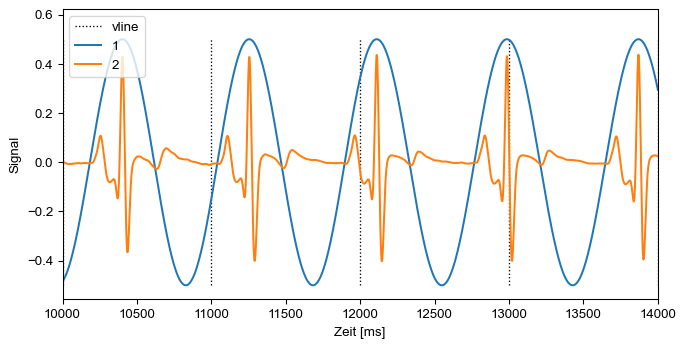

In [210]:
fig = plt.figure(figsize=(8,4), dpi=96)

plt.xlim(xlim1, xlim2)
# plt.plot(ibi_ts_0)
test = np.array(data[0])

plt.xlabel('Zeit [ms]')
plt.ylabel('Signal')
plt.vlines(x=list(range(0,len(rpeaks[0]),1000)), ymin=-0.5, ymax=0.5, colors='black', ls=':', lw=1, label='vline')

plt.plot(test,"-", label="1")
plt.plot(ecg[0],"-", label="2")
plt.legend(loc="upper left")

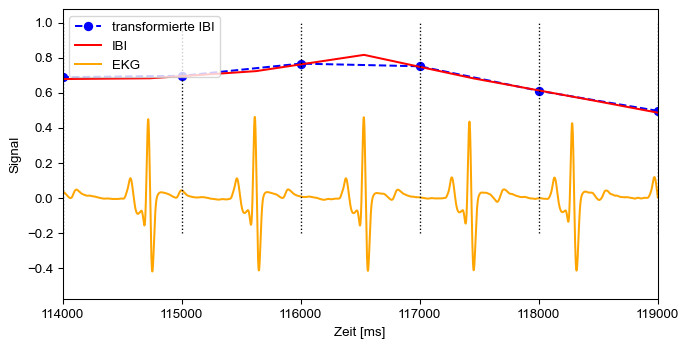

In [211]:
def get_normalized_df(df):
    normalized_df = (df-df.min())/(df.max()-df.min())
    return normalized_df

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlabel('Zeit [ms]')
plt.ylabel('Signal')
plt.xlim(xlim1+104000, xlim2+105000)

plt.plot(get_normalized_df(ibi_ts_ip_win[0]),'b--o', label="transformierte IBI")

plt.plot(get_normalized_df(ibi_ts_ip[0]),'r',label="IBI")
plt.plot(ecg[0], 'orange',label="EKG")

# plt.plot(get_normalized_df(ibi_ts_ip_1hz_0),'ro')


plt.legend(loc="upper left")
# plt.plot(data_0)
# multiple lines all full height
plt.vlines(x=list(range(0,len(rpeaks[0]),1000)), ymin=-0.2, ymax=1, colors='black', ls=':', lw=1, label='vline_multiple - full height')
# ibi_ts_ip = ibi_ts.replace(0, np.nan, inplace=False)

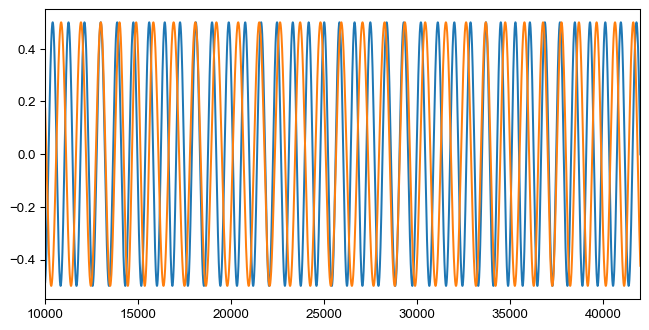

In [212]:
fig = plt.figure(figsize=(8,4), dpi=96)

plt.xlim(xlim1, xlim2*3)

plt.plot(data[0])
plt.plot(data[1])


1064.0
1
0.5


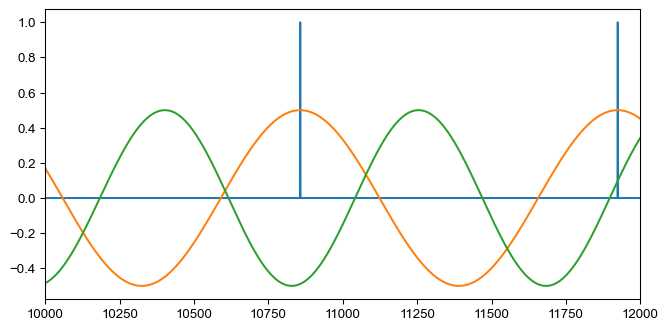

In [213]:
# Sanity check
rpeaks_idx = []
for i in range(num_participants):
    rpeaks_idx.append([i for i, x in enumerate(rpeaks[1]) if x == 1])  

q = 200
print(ibi_ts[1][rpeaks_idx[1][q]])
print(rpeaks[1][rpeaks_idx[1][q]])
print(data[1][rpeaks_idx[1][q]])
ibi[1][8]

fig = plt.figure(figsize=(8,4), dpi=96)
plt.xlim(10000,12000)
plt.plot(rpeaks[1])
plt.plot(data[1])
plt.plot(data[0])

In [214]:
a = np.array([data[0][10000:310000], data[1][10000:310000]])
b = np.array(data[1][10000:310000])
a = np.transpose(a)
# df = np.array[a,b]
df = pd.DataFrame(a)
df

# df.to_csv("df.csv")

,0,1
0,-0.484665,0.170161
1,-0.483768,0.167379
2,-0.482846,0.164591
3,-0.481899,0.161798
4,-0.480927,0.158999
...,...,...
289995,NaN,NaN
289996,NaN,NaN
289997,NaN,NaN
289998,NaN,NaN


In [215]:
# https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9?gi=adaa371d2114

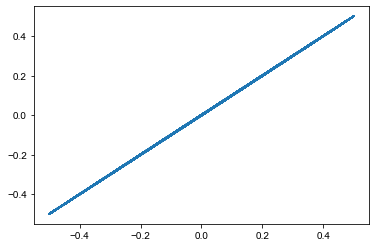

In [216]:
# Sanity check

data2 = np.load(f"data/data_{condition[1]}.npy")
plt.plot(data[1][2000:298000:20],data2[1])
